In [5]:
import pandas as pd
import matplotlib.pyplot as plt

## Part 1
读取活动数据，观察：
- 打卡天数与GPA的关系
- 打卡天数的分布
- GPA均值与方差随各年级的变化
- GPA在各年级的分布

并且进行数据可视化。

## Part 2
生成获奖名单（写入excel）

一等奖：打卡200天，奖品一台Kindle

二等奖：打卡190天~199天，奖品一个小米手环

三等奖：打卡180天~189天，奖品一沓数学作业纸


## Part 3
获奖情况公示（批量写入word）


In [6]:
# 使用Pandas读取excel文件
data = pd.read_excel("活动数据.xlsx")

In [7]:
# 查看data是什么样的
data

,姓名,ID,分组,加入时间,打卡天数,GPA,备注
0,沈五,2016024473,无,2020-02-24 19:41:10,86,1.486977,外校学生
1,李嘉轩,2016049848,无,2020-02-23 22:49:21,2,1.045411,本校学生
2,郎子豪,2016106549,无,2020-03-13 08:22:06,89,1.698727,外校学生
3,朱子轩,2016107915,无,2020-02-24 11:00:48,47,1.049465,本校学生
4,严平,2016113852,无,2020-02-22 18:33:52,78,1.427000,外校学生
...,...,...,...,...,...,...,...
278,云甜,2020002622,无,2020-02-22 18:50:19,79,1.397132,本校学生
279,何五,2020015167,无,2020-05-31 17:04:114,78,1.589893,外校学生
280,范备,2020047432,无,2020-02-23 11:02:04,104,2.047559,本校学生
281,邹援朝,2020048194,无,2020-02-22 18:35:09,70,1.382735,外校学生


In [8]:
# 按列访问
data["GPA"]

0      1.486977
1      1.045411
2      1.698727
3      1.049465
4      1.427000
         ...   
278    1.397132
279    1.589893
280    2.047559
281    1.382735
282    1.899145
Name: GPA, Length: 283, dtype: float64

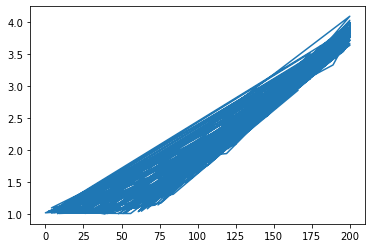

In [9]:
# （1）直接画折线图：GPA与打卡天数的关系
plt.plot(data["打卡天数"], data["GPA"])


In [10]:
# 排序
data.sort_values(by="打卡天数",ascending=False)

,姓名,ID,分组,加入时间,打卡天数,GPA,备注
248,张援朝,2019555745,无,2020-02-22 18:57:30,200,4.095200,外校学生
26,陈捷,2016422048,无,2020-02-23 11:12:54,200,3.982841,本校学生
252,秦清扬,2019625078,无,2020-02-22 19:25:25,200,4.031332,本校学生
163,秦庄,2018347937,无,2020-02-23 20:21:30,200,3.998989,外校学生
110,苏民,2017540457,无,2020-02-23 23:17:47,200,3.898941,外校学生
...,...,...,...,...,...,...,...
134,华四,2017933900,无,2020-02-24 21:50:23,4,1.016469,外校学生
190,谢若飞,2018671634,无,2020-02-22 18:47:02,4,1.096413,本校学生
73,喻羽,2017060468,无,2020-02-24 18:27:09,3,1.029540,本校学生
1,李嘉轩,2016049848,无,2020-02-23 22:49:21,2,1.045411,本校学生


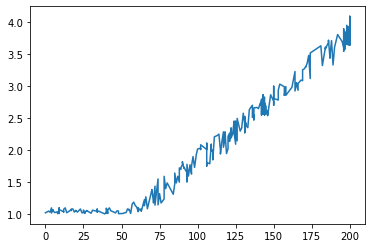

In [11]:
# （2）排序后画折线图：GPA与打卡天数的关系
data_sorted = data.sort_values(by="打卡天数")
x = data_sorted["打卡天数"]
y = data_sorted["GPA"]
plt.plot(x,y)
plt.show()

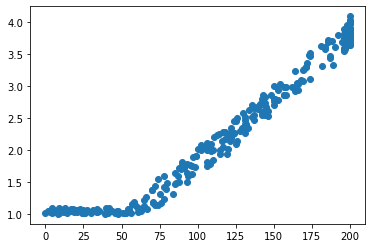

In [12]:
# （3）画散点图：GPA与打卡天数的关系
plt.scatter(data["打卡天数"], data["GPA"])
plt.show()

In [13]:
# （4）使用子图画散点图：GPA与打卡天数的关系
# 步骤一：分离两类数据
data_in = data[data["备注"] == "本校学生"]
x = data_in["打卡天数"]
y = data_in["GPA"]

data_out = data[data["备注"] == "外校学生"]
x2 = data_out["打卡天数"]
y2 = data_out["GPA"]

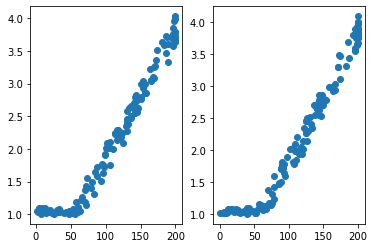

In [14]:
# 步骤二：分别画两个子图
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.subplot(1, 2, 2)
plt.scatter(x2, y2)

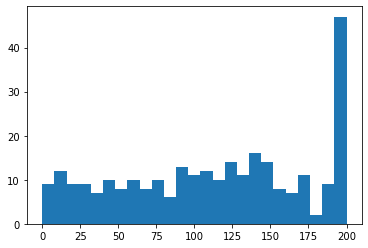

In [15]:
# （5）画条形图：打卡天数的分布
plt.hist(data["打卡天数"], bins=25)
plt.show()

In [16]:
# （6）画折线图：GPA均值与方差随各年级的变化
# 步骤一：分离出年级
year_list = data["ID"] // 1000000
year_list

0      2016
1      2016
2      2016
3      2016
4      2016
       ... 
278    2020
279    2020
280    2020
281    2020
282    2020
Name: ID, Length: 283, dtype: int64

In [17]:
# 步骤二:新建一列
data["入学年份"] = year_list
data

,姓名,ID,分组,加入时间,打卡天数,GPA,备注,入学年份
0,沈五,2016024473,无,2020-02-24 19:41:10,86,1.486977,外校学生,2016
1,李嘉轩,2016049848,无,2020-02-23 22:49:21,2,1.045411,本校学生,2016
2,郎子豪,2016106549,无,2020-03-13 08:22:06,89,1.698727,外校学生,2016
3,朱子轩,2016107915,无,2020-02-24 11:00:48,47,1.049465,本校学生,2016
4,严平,2016113852,无,2020-02-22 18:33:52,78,1.427000,外校学生,2016
...,...,...,...,...,...,...,...,...
278,云甜,2020002622,无,2020-02-22 18:50:19,79,1.397132,本校学生,2020
279,何五,2020015167,无,2020-05-31 17:04:114,78,1.589893,外校学生,2020
280,范备,2020047432,无,2020-02-23 11:02:04,104,2.047559,本校学生,2020
281,邹援朝,2020048194,无,2020-02-22 18:35:09,70,1.382735,外校学生,2020


In [18]:
# 步骤二：根据年级进行分类，求均值和方差，填入列表
x_list = []
ave_gpa_list = []
var_gpa_list = []
for year in range(2016, 2021):
    x_list.append(str(year))
    ave = data[data["入学年份"] == year]["GPA"].mean()
    var = data[data["入学年份"] == year]["GPA"].var()
    ave_gpa_list.append(ave)
    var_gpa_list.append(var)
ave_gpa_list

[2.0224204193665734,
 2.3182531062929677,
 2.140644549715466,
 2.5612081313577577,
 1.663292828589125]

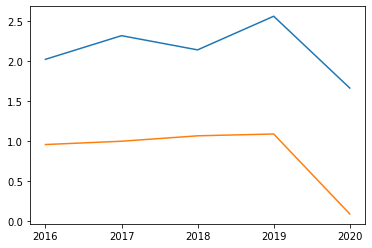

In [19]:
# 步骤三：把列表画出来
plt.plot(x_list, ave_gpa_list)
plt.plot(x_list, var_gpa_list)


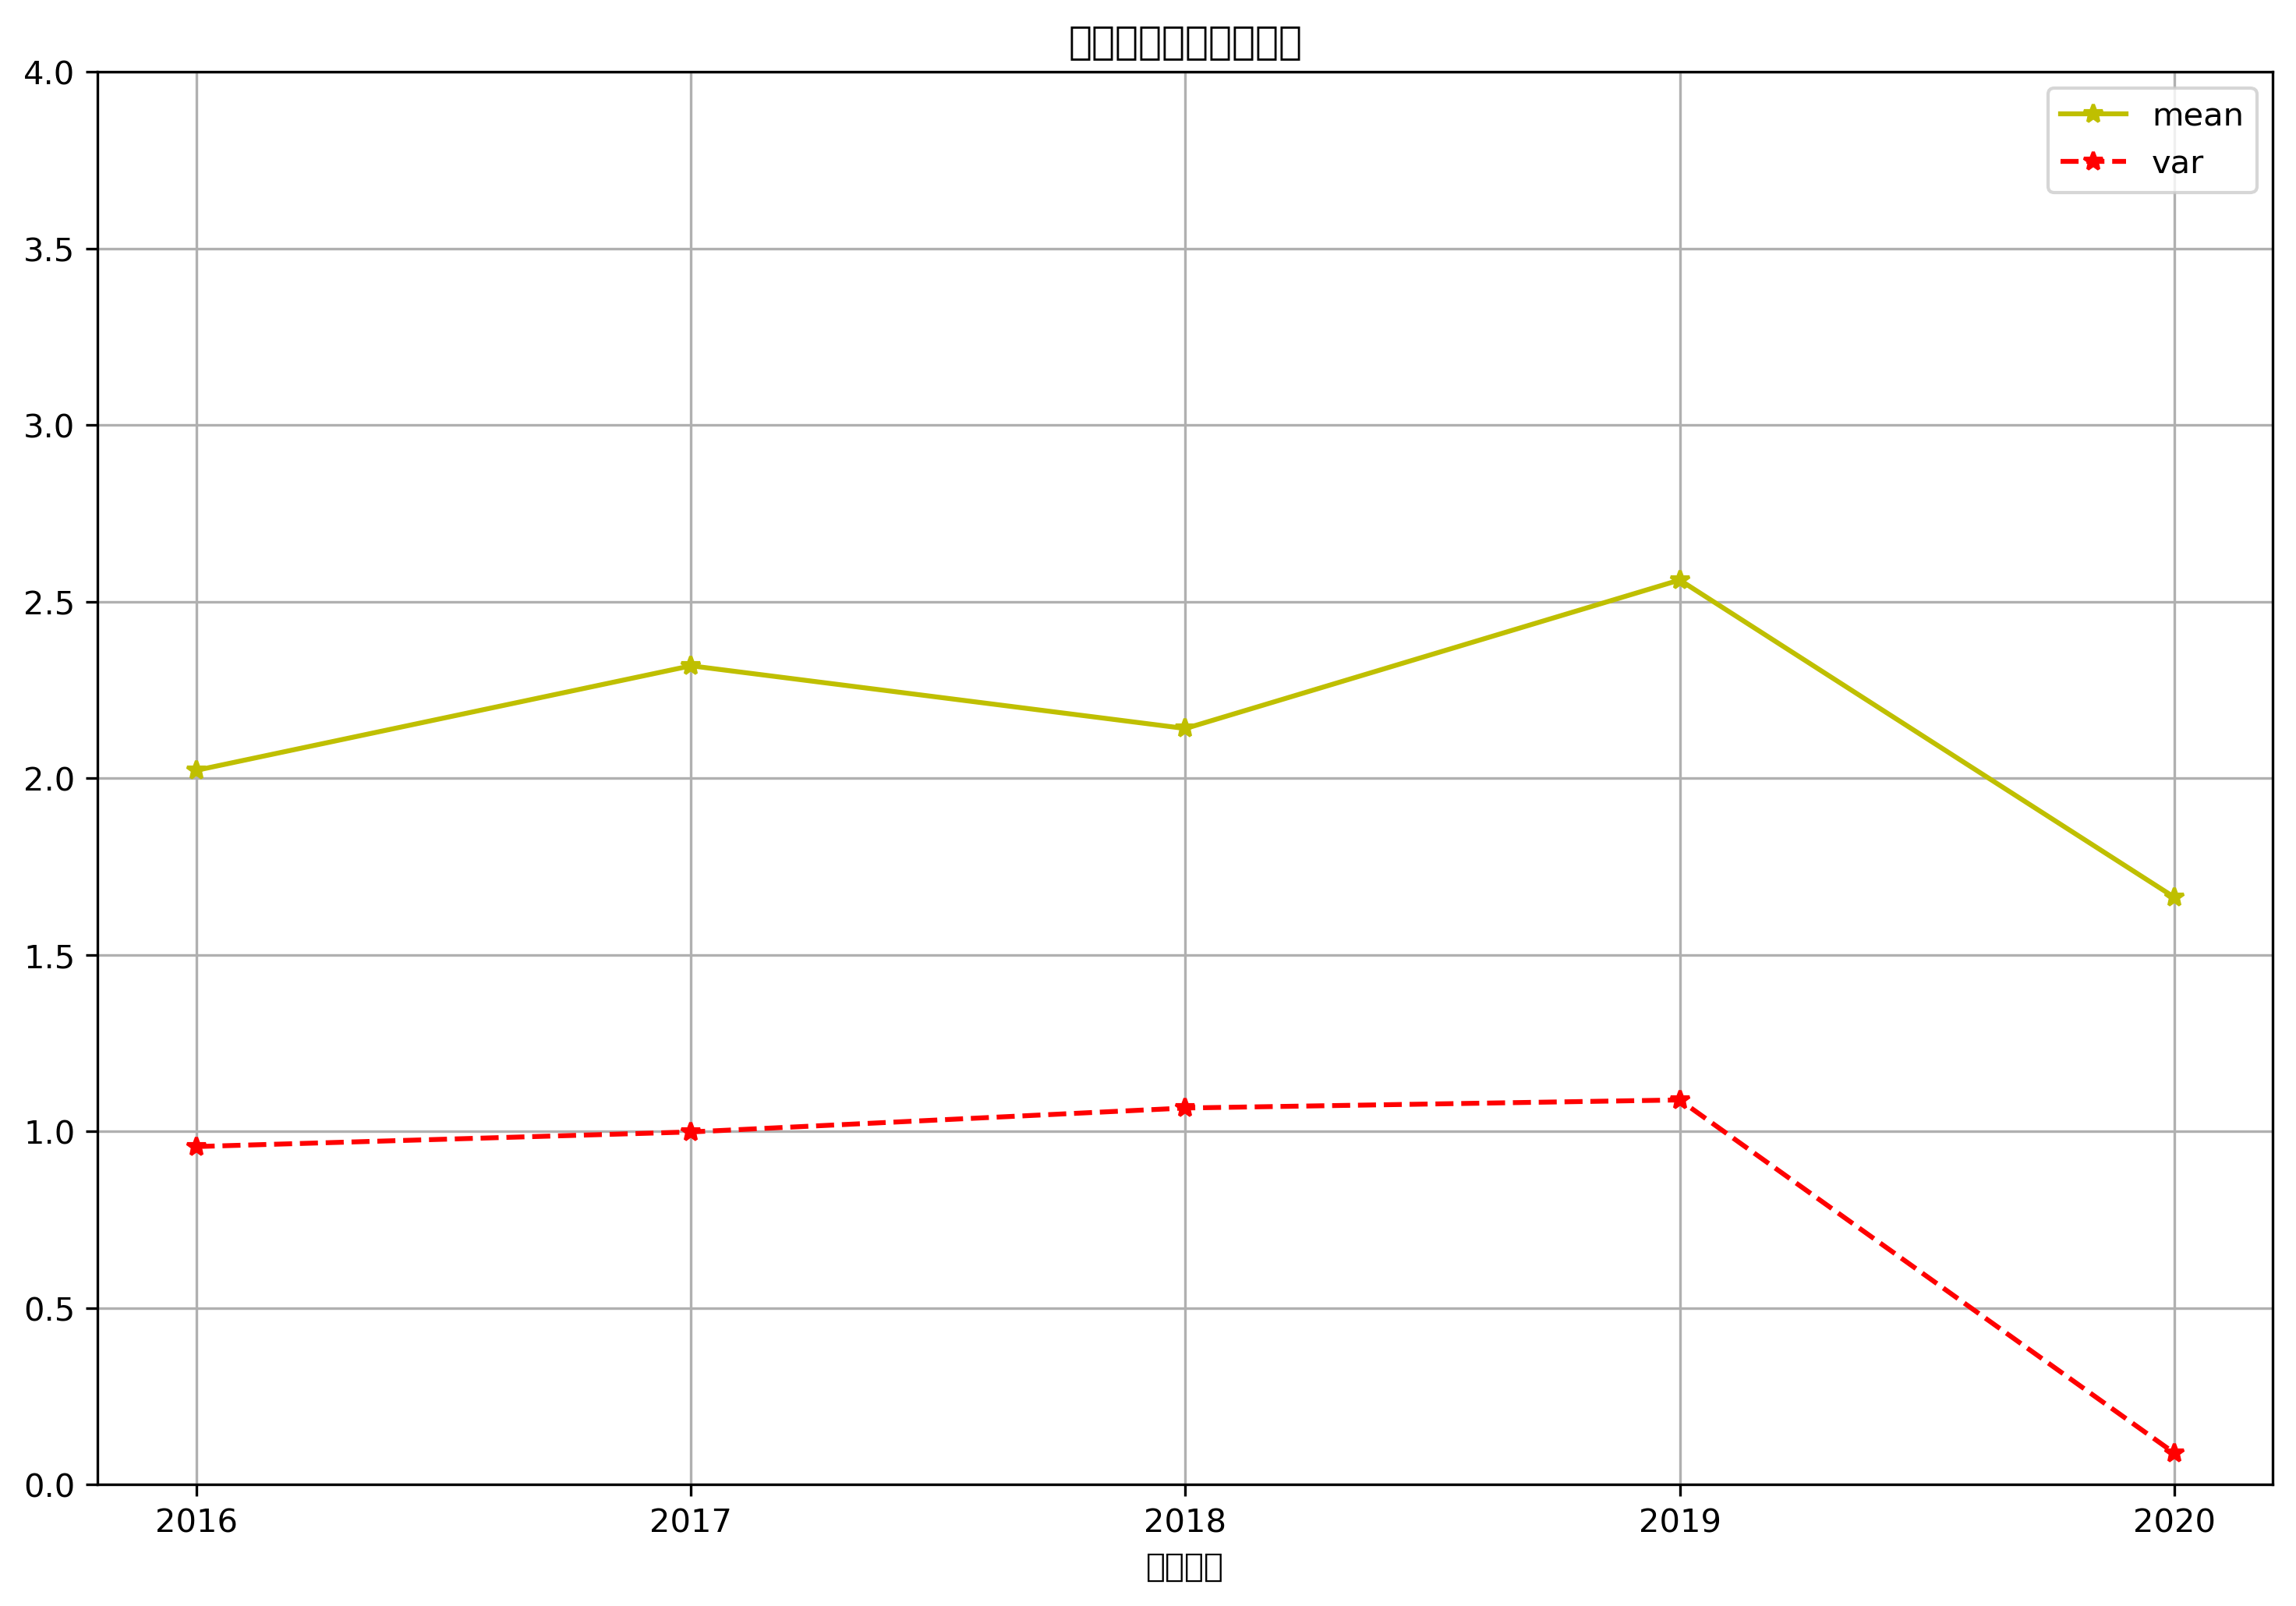

In [20]:
# 设置图片大小,分辨率
# 设置线型,颜色,点的形状
# 设置标题,轴标签,图例,坐标范围,网格
# 显示图像与保存图像
plt.figure(figsize=(12, 8), dpi=300)
plt.plot(x_list, ave_gpa_list, "y-*")
plt.plot(x_list, var_gpa_list, "r--*")
plt.title("成绩随年级的变化趋势")
plt.xlabel("入学年份")
plt.legend(["mean", "var"])
plt.ylim([0, 4])
plt.grid(1)
# plt.show()
plt.savefig("results/GPA均值与方差随各年级的变化(折线图).jpg")


In [21]:
# 如何支持中文?
# 如果要在图中使用中文，需要加上这两行
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False  # 用来正常显示负号


In [22]:
# （7）画箱线图：GPA在各年级的分布
# 步骤一：根据年级进行分类，求均值和方差，填入列表
gpa_year_list = []
for year in range(2016, 2021):
    GPAs = data[data["入学年份"] == year]["GPA"]
    gpa_year_list.append(GPAs)

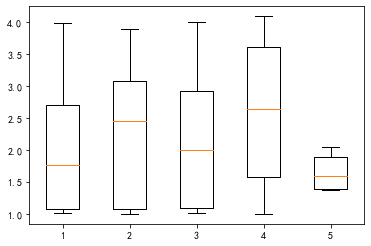

In [23]:
# 步骤二：画箱线图
plt.boxplot(gpa_year_list)
plt.show()


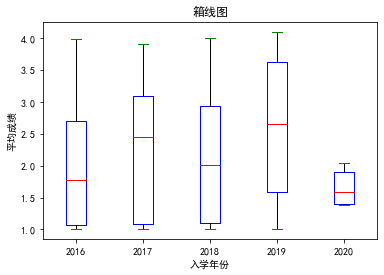

In [24]:
# 画更好看的箱线图
plt.boxplot(
    gpa_year_list,
    notch=False,  # 中位线处不设置凹陷
    widths=0.3,  # 设置箱体宽度
    medianprops={"color": "red"},  # 中位线设置为红色
    boxprops=dict(color="blue"),  # 箱体边框设置为蓝色
    labels=[2016, 2017, 2018, 2019, 2020],  # 设置标签
    whiskerprops={"color": "black"},  # 设置须的颜色，黑色
    capprops={"color": "green"},  # 设置箱线图顶端和末端横线的属性，颜色为绿色
)

plt.title("箱线图")
plt.xlabel("入学年份")
plt.ylabel("平均成绩")
plt.show()

上述数据处理、可视化部分已经被整理到L3_plot.py文件中

### 中场总结
以上是使用pandas进行数据分析:
- 读取excel表格，读取为pandas的dataframe格式
- 按照列读取数据表中的数据，筛选，排序，对整列进行运算，新增列，删除列，均值方差

以及用matplotlib.pyplot进行可视化:
- 折线图，散点图，条形图，子图，箱线图
- 标题，图例，轴标签，坐标范围，线型，颜色，格点
- 创建图窗，图像尺寸，分辨率，图像显示，保存为文件

## Part 2
生成获奖名单（写入excel）

一等奖：打卡200天，奖品一台Kindle

二等奖：打卡190天~199天，奖品一个小米手环

三等奖：打卡180天~189天，奖品一沓数学作业纸

## Part 3
获奖情况公示（批量写入word）

In [25]:
data

,姓名,ID,分组,加入时间,打卡天数,GPA,备注,入学年份
0,沈五,2016024473,无,2020-02-24 19:41:10,86,1.486977,外校学生,2016
1,李嘉轩,2016049848,无,2020-02-23 22:49:21,2,1.045411,本校学生,2016
2,郎子豪,2016106549,无,2020-03-13 08:22:06,89,1.698727,外校学生,2016
3,朱子轩,2016107915,无,2020-02-24 11:00:48,47,1.049465,本校学生,2016
4,严平,2016113852,无,2020-02-22 18:33:52,78,1.427000,外校学生,2016
...,...,...,...,...,...,...,...,...
278,云甜,2020002622,无,2020-02-22 18:50:19,79,1.397132,本校学生,2020
279,何五,2020015167,无,2020-05-31 17:04:114,78,1.589893,外校学生,2020
280,范备,2020047432,无,2020-02-23 11:02:04,104,2.047559,本校学生,2020
281,邹援朝,2020048194,无,2020-02-22 18:35:09,70,1.382735,外校学生,2020


In [26]:
# 通过条件判断，找出一等奖获奖同学
winners1 = data[data["打卡天数"] == 200]


In [27]:
# 新建两列，存放等级和奖品
winners1[["等级", "奖品"]] = ["一等奖", "一台Kindle"]

# 以此类推到二等奖、三等奖
winners2 = data[(data["打卡天数"] >= 190) & (data["打卡天数"] < 200)]
winners2[["等级", "奖品"]] = ["二等奖", "一个小米手环"]

winners3 = data[(data["打卡天数"] >= 180) & (data["打卡天数"] < 190)]
winners3[["等级", "奖品"]] = ["三等奖", "一沓数学作业纸"]

In [28]:
# 直接写入excel
winners1.to_excel("output/获奖名单.xlsx", sheet_name="一等奖", startcol=0, index=False)
winners2.to_excel("output/获奖名单.xlsx", sheet_name="二等奖", startcol=0, index=False)
winners3.to_excel("output/获奖名单.xlsx", sheet_name="三等奖", startcol=0, index=False)

In [29]:
# 不会覆盖的写入方法
writer = pd.ExcelWriter("output/获奖名单.xlsx")
winners1.to_excel(writer, sheet_name="一等奖", startcol=0, index=False)
winners2.to_excel(writer, sheet_name="二等奖", startcol=0, index=False)
winners3.to_excel(writer, sheet_name="三等奖", startcol=0, index=False)
writer.save()
writer.close()

上述生成excel部分已经被整理到L3_to_excel.py文件中

## Part 3

获奖情况公示（批量写入word）

In [30]:
# 按照行遍历dataframe的元素
info = ""
for index,row in winners1.iterrows():
    print(index,row[1])
    info = row
    break

13 2016242417


In [31]:
info

姓名                      沈嘉轩
ID               2016242417
分组                        无
加入时间    2020-02-22 20:32:59
打卡天数                    200
GPA                 3.67115
备注                     外校学生
入学年份                   2016
等级                      一等奖
奖品                 一台Kindle
Name: 13, dtype: object

In [32]:
# 先组成一段话试试
text = f"根据海量专家的精密计算，{info[0]}同学在本次活动中成功打卡{info[4]}天，GPA达到了{info[5]:0.4f}，获得{info[8]}，奖品是{info[9]}。特此公示。"
text

'根据海量专家的精密计算，沈嘉轩同学在本次活动中成功打卡200天，GPA达到了3.6711，获得一等奖，奖品是一台Kindle。特此公示。'

In [33]:
# 写入docx文件，首先需要导入python-docx模块
import docx

In [34]:
# 创建文档对象，写入段落，保存文件
doc = docx.Document()
text = "你好呀！我今天很开心，给你讲个故事吧!"
text2 = "王子猷居山阴，夜大雪，眠觉，开室命酌酒，四望皎然。因起彷徨，咏左思《招隐诗》。忽忆戴安道。时戴在剡，即便夜乘小舟就之。经宿方至，造门不前而返。人问其故，王曰：“吾本乘兴而行，兴尽而返，何必见戴？”"
doc.add_paragraph(text)
doc.add_paragraph(text2)
doc.save("测试.docx")

In [39]:
# 增加内容、落款和日期
doc = docx.Document()  # 创建文档对象

heading = doc.add_paragraph("公示")  # 创建段落对象，调整格式作为标题
text = f"根据海量专家的精密计算，{info[0]}同学在本次活动中成功打卡{info[4]}天，GPA达到了{info[5]:0.4f}，获得{info[8]}，奖品是{info[9]}。特此公示。"
paragraph = doc.add_paragraph(text)

text2 = "公示期自即日始5个工作日，凡对上述同学获奖有意见者，请及时以书面或口头形式向XX大学学生学业发展中心反映。"
paragraph = doc.add_paragraph(text2)

paragraph = doc.add_paragraph("XX大学学生学业发展中心")  # 落款
paragraph = doc.add_paragraph("2020年11月1日")  # 日期

# 保存文档（保存时请确认该文档是关闭的，否则会出权限错误）
doc.save(f"测试_公示_{info[8]}_{info[0]}.docx")

In [68]:
# 创建文档对象，写入段落，保存文件
doc = docx.Document()
doc.add_paragraph(text)
doc.save(f"output/公示_{info[8]}_{info[0]}.docx")

In [73]:
# 设置正文格式，使用中文字体
from docx.oxml.ns import qn  # 设置字体
from docx.shared import Cm, Inches, Pt, RGBColor  # 用来设置字体大小、缩进; 设置字体的颜色
from docx.enum.text import WD_ALIGN_PARAGRAPH  # 设置对齐方式

doc = docx.Document()

doc.styles["Normal"].font.size = Pt(14)
doc.styles["Normal"].font.name = u"仿宋"  # 设置当文字是西文时的字体
doc.styles["Normal"]._element.rPr.rFonts.set(qn("w:eastAsia"), u"仿宋")  # 设置当文字是中文时的字体


doc.add_paragraph(text)
doc.save(f"output/公示_{info[8]}_{info[0]}.docx")

In [74]:
# 设置标题
doc = docx.Document()

heading = doc.add_paragraph("")  # 创建段落对象，当作标题
heading.alignment = WD_ALIGN_PARAGRAPH.CENTER  # 设置为居中对齐
heading.paragraph_format.space_before = Pt(0)  # 设置段前间距 0 磅
heading.paragraph_format.space_after = Pt(12)  # 设置段后 12 磅
heading.paragraph_format.line_spacing = 1  # 设置行间距为 1 倍
heading.paragraph_format.left_indent = Inches(0)  # 设置左缩进 0 英寸
heading.paragraph_format.right_indent = Inches(0)  # 设置右缩进 0 英寸

title = "公示"
run = heading.add_run(title) # 增加文字内容

run.font.name = u"黑体"  # 设置字体
run._element.rPr.rFonts.set(qn("w:eastAsia"), u"黑体")  # 设置为字体，和上边的保持一致
run.font.size = Pt(20)  # 设置文字的大小为20磅
run.font.color.rgb = RGBColor(0, 0, 0)  # 设置颜色为黑色

# 正文部分
doc.styles["Normal"].font.size = Pt(14)
doc.styles["Normal"].font.name = u"仿宋"  # 设置当文字是西文时的字体
doc.styles["Normal"]._element.rPr.rFonts.set(qn("w:eastAsia"), u"仿宋")  # 设置当文字是中文时的字体

doc.add_paragraph(text)





doc.save(f"output/公示_{info[8]}_{info[0]}.docx")

In [75]:
# 获取日期
import locale
import time

locale.setlocale(locale.LC_CTYPE, "chinese")
date = time.strftime("%Y年%m月%d日")
date

'2020年10月31日'

In [84]:
# 增加内容、落款和日期
doc = docx.Document()  # 创建文档对象

heading = doc.add_paragraph("")  # 创建段落对象，调整格式作为标题
heading.alignment = WD_ALIGN_PARAGRAPH.CENTER  # 设置为居中对齐

title = "公示"
run = heading.add_run(title)  # 添加标题文字

run.font.name = "黑体"  # 设置当文字是西文时的字体
run._element.rPr.rFonts.set(qn("w:eastAsia"), "黑体")  # 设置当文字是中文时的字体
run.font.size = Pt(20)  # 设置文字的大小为20磅
# run.font.color.rgb = RGBColor(0, 0, 0)  # 设置颜色为黑色


# 设置正文格式
doc.styles["Normal"].font.size = Pt(14)
doc.styles["Normal"].font.name = "仿宋"  # 设置当文字是西文时的字体
doc.styles["Normal"]._element.rPr.rFonts.set(qn("w:eastAsia"), "仿宋")  # 设置当文字是中文时的字体

# 添加正文信息
doc.add_paragraph("")  # 增加空段落
text = f"根据海量专家的精密计算，{info[0]}同学在本次活动中成功打卡{info[4]}天，GPA达到了{info[5]:0.4f}，获得{info[8]}，奖品是{info[9]}。特此公示。"
paragraph = doc.add_paragraph(text)
paragraph.paragraph_format.first_line_indent = Cm(1)  # 设置左缩进 1 英寸


text2 = "公示期自即日始5个工作日，凡对上述同学获奖有意见者，请及时以书面或口头形式向XX大学学生学业发展中心反映。"
paragraph = doc.add_paragraph(text2)
paragraph.paragraph_format.first_line_indent = Cm(1)  # 设置左缩进 1 英寸

doc.add_paragraph("")  # 增加空段落

paragraph = doc.add_paragraph("XX大学学生学业发展中心")  # 落款
paragraph.alignment = WD_ALIGN_PARAGRAPH.RIGHT  # 右对齐

paragraph = doc.add_paragraph(date)  # 日期
paragraph.alignment = WD_ALIGN_PARAGRAPH.RIGHT  # 右对齐

# 保存文档（保存时请确认该文档是关闭的，否则会出权限错误）
doc.save(f"output/公示_{info[8]}_{info[0]}.docx")

In [85]:
# 封装成函数，准备批量生产文档
def denerate_docx(info):
    doc = docx.Document()  # 创建文档对象

    heading = doc.add_paragraph("")  # 创建段落对象，当作标题
    heading.alignment = WD_ALIGN_PARAGRAPH.CENTER  # 设置为居中对齐
    # heading.paragraph_format.space_before = Pt(0)  # 设置段前间距 0 磅
    # heading.paragraph_format.space_after = Pt(12)  # 设置段后 12 磅
    # heading.paragraph_format.line_spacing = 1  # 设置行间距为 1 倍
    # heading.paragraph_format.left_indent = Inches(0)  # 设置左缩进 0 英寸
    # heading.paragraph_format.right_indent = Inches(0)  # 设置右缩进 0 英寸

    title = "公示"
    run = heading.add_run(title)  # 添加标题文字

    run.font.name = "黑体"  # 设置字体
    run._element.rPr.rFonts.set(qn("w:eastAsia"), "黑体")  # 设置为字体，和上边的保持一致
    run.font.size = Pt(20)  # 设置文字的大小为20磅
    run.font.color.rgb = RGBColor(0, 0, 0)  # 设置颜色为黑色


    # 设置正文格式
    doc.styles["Normal"].font.size = Pt(14)
    doc.styles["Normal"].font.name = "仿宋"  # 设置当文字是西文时的字体
    doc.styles["Normal"]._element.rPr.rFonts.set(qn("w:eastAsia"), "仿宋")  # 设置当文字是中文时的字体

    # 添加正文信息
    doc.add_paragraph("")  # 增加空段落
    text = f"根据海量专家的精密计算，{info[0]}同学在本次活动中成功打卡{info[4]}天，GPA达到了{info[5]:0.4f}，获得{info[8]}，奖品是{info[9]}。特此公示。"
    paragraph = doc.add_paragraph(text)
    paragraph.paragraph_format.first_line_indent = Cm(1)  # 设置左缩进 1 英寸


    text2 = "公示期自即日始5个工作日，凡对上述同学获奖有意见者，请及时以书面或口头形式向XX大学学生学业发展中心反映。"
    paragraph = doc.add_paragraph(text2)
    paragraph.paragraph_format.first_line_indent = Cm(1)  # 设置左缩进 1 英寸

    doc.add_paragraph("")  # 增加空段落

    paragraph = doc.add_paragraph("XX大学学生学业发展中心")  # 落款
    paragraph.alignment = WD_ALIGN_PARAGRAPH.RIGHT  # 右对齐

    paragraph = doc.add_paragraph(date)  # 日期
    paragraph.alignment = WD_ALIGN_PARAGRAPH.RIGHT  # 右对齐

    # 保存文档（保存时请确认该文档是关闭的，否则会出权限错误）
    doc.save(f"output/公示_{info[8]}_{info[0]}.docx")

In [79]:
# 循环调用函数，生成大量文档
for index,row in winners1.iterrows():
    denerate_docx(row)
    
for index,row in winners2.iterrows():
    denerate_docx(row)

for index,row in winners3.iterrows():
    denerate_docx(row)


上述生成word部分已经被整理到L3_to_word.py文件中